In [1]:
# Import initial libraries
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

## Loading and Preprocessing Loans Encoded Data

In [2]:
# Load the dataset
file_path = "seattle-weather.csv"
seattle_weather = pd.read_csv(file_path)
seattle_weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
# Convert 'date' column to datetime format
seattle_weather['date'] = pd.to_datetime(seattle_weather['date'])

# Extract month and day as numerical features
seattle_weather['month'] = seattle_weather['date'].dt.month
seattle_weather['day'] = seattle_weather['date'].dt.day

seattle_weather.info()
seattle_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   month          1461 non-null   int32         
 7   day            1461 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(2), object(1)
memory usage: 80.0+ KB


,date,precipitation,temp_max,temp_min,wind,weather,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1,5


In [4]:
# Define features (X) and target variable (y)
X = seattle_weather[['precipitation', 'temp_max', 'temp_min', 'wind', 'month', 'day']]
y = seattle_weather['weather']

In [5]:
# splitting the data into training and testing (by default : training 75%, testing 25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fitting the Random Forest Model

In [7]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Making Predictions Using the Random Forest Model

In [8]:
# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

In [9]:
# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [10]:
# Display the classification report
print("Classification Report:\n", class_report)

# Display the confusion matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix, index=rf_classifier.classes_, columns=rf_classifier.classes_))

# Print Accuracy Score
print(f"\nAccuracy Score: {accuracy:.2f}")

Classification Report:
               precision    recall  f1-score   support

     drizzle       0.33      0.08      0.12        13
         fog       0.40      0.16      0.23        25
        rain       0.97      0.89      0.93       161
        snow       1.00      0.29      0.44         7
         sun       0.76      0.96      0.85       160

    accuracy                           0.83       366
   macro avg       0.69      0.47      0.51       366
weighted avg       0.81      0.83      0.81       366


Confusion Matrix:
         drizzle  fog  rain  snow  sun
drizzle        1    1     0     0   11
fog            0    4     0     0   21
rain           0    0   144     0   17
snow           0    0     5     2    0
sun            2    5     0     0  153

Accuracy Score: 0.83


In [16]:
seattle_weather['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [16]:
seattle_weather['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

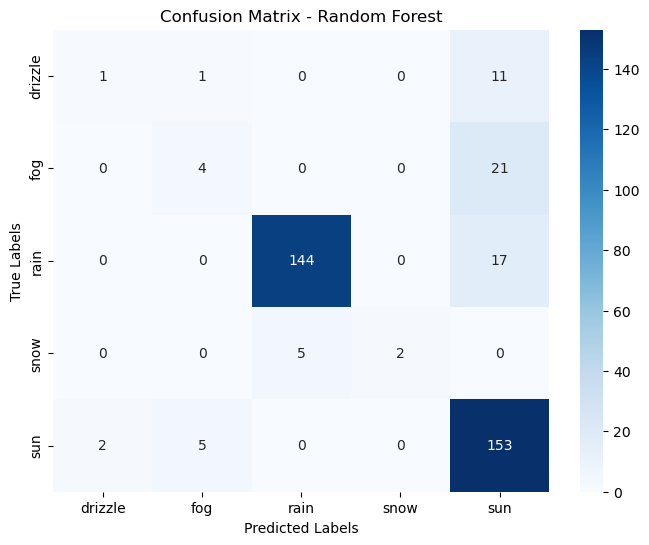

In [11]:
# Create the heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, fmt='d', 
            cmap='Blues', 
            xticklabels=rf_classifier.classes_, 
            yticklabels=rf_classifier.classes_)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## Analysis

### Classification Report

The classification report provides key metrics that summarize the model’s performance across different weather conditions.

* Precision : % of predicted positive cases that are actually correct (TP / (TP + FP))
* Recall (Sensitivity) : % of actual positive cases correctly identified (TP / (TP + FN))
* F1-Score : Harmonic mean of precision & recall (2 × (Precision × Recall) / (Precision + Recall))
* Support : Number of true instances per class
    
Interpretation based on the data :

Rain: Precision = 0.97, Recall = 0.89, F1-Score = 0.93
    * The model correctly classifies rainy days 97% of the time (Precision).
    * It captures 89% of actual rainy days (Recall).
    * F1-score of 0.93 shows overall strong performance.

Drizzle: Precision = 0.33, Recall = 0.08, F1-score = 0.12
    * The model struggles to classify drizzle, it might be many drizzle days are misclassified.
    * This suggests that drizzle is hard to differentiate from other conditions.


### Confusion Matrix

The confusion matrix provides insights into how well the model classifies different weather conditions. 
It shows the number of correct and incorrect predictions.

Each row represents the actual class, and each column represents the predicted class.

* True Positives (TP): Correctly predicted weather conditions.
* False Positives (FP): Incorrectly predicted weather conditions.
* False Negatives (FN): Missed predictions where the actual label was different.
* True Negatives (TN): Correctly rejected labels.

Interpretation based on the data :

If Rain has 144 in its row under the Rain column, it means 144 rainy days were correctly classified.
If Rain has 17 under Sun, it means 17 rainy days were misclassified as sunny days.


### Accuracy Score

Accuracy Score = 0.83 (83%)
Meaning: The model correctly predicts 83% of weather conditions.
Limitation: Accuracy does not consider class imbalance (some weather types might be rare).
    

    
### Conclusion

* Rainy and Sunny days are well-classified, based on high precision and recall.
* Drizzle and Fog show weaker performance, meaning they might need more feature engineering.
* Improvement Suggestions:
    * Use more features (e.g., humidity, pressure) to differentiate conditions.
    * Use a balanced dataset to improve classification of rare weather types.
    * Retrieve more data using open API (e.g., Open Weather Data)

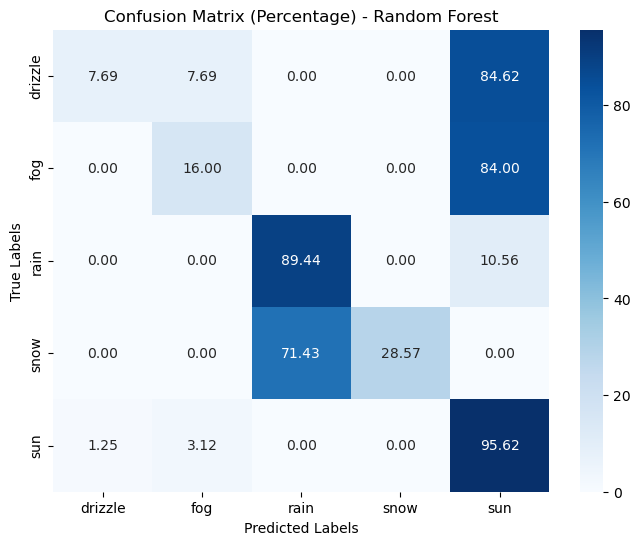

In [14]:
import numpy as np

# Convert confusion matrix to percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Create the heatmap for percentage-based confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, 
            annot=True, fmt=".2f",  # Show percentages with two decimal places
            cmap='Blues', 
            xticklabels=rf_classifier.classes_, 
            yticklabels=rf_classifier.classes_)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentage) - Random Forest')
plt.show()

#### How to Interpret the Heatmap?

* Diagonal values (e.g., Rain → Rain, Sun → Sun) should be high (correct classifications).
* Off-diagonal values (e.g., Snow misclassified as Rain) indicate misclassifications.
* The higher the percentage in a cell, the more frequently the model makes that prediction for that actual class.

####  Interpretation:

* “Sun → Sun” = 95.62% → The model correctly predicts sunny weather 95.62% of the time.
* “Snow → Rain” = 71.43% → The model misclassifies 71.43% of snowy days as rainy.
* “Drizzle → Sun” = 84.62% → Most drizzle days are incorrectly classified as sunny.